# Exploratory Data Analysis of Amazon Sales

This report will delve into the following key areas:

- **Category-wise Sales Performance**: A breakdown of total sales across different product categories.
- **Product-level Sales Summary**: Analysis of individual product sales totals.
- **Trend Insights**: Identification of sales trends over time.
- **Customer & Geographic Distribution**: Examination of customer demographics and their geographic locations.
- **Preferred Payment Methods**: Overview of commonly used payment methods among customers.
- **Order Status Summary**: Evaluation of the current state of all orders (e.g., completed, pending, canceled).
- **Sales Improvement Suggestions**: Strategic recommendations aimed at boosting overall sales performance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"E:\General\amazon_sales_data 2025.csv")

In [3]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d')

## Total seles of each catagory

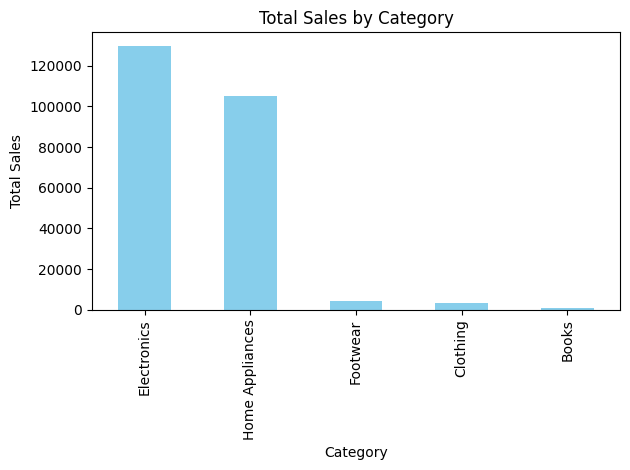

In [16]:
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Category', color='skyblue')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Total sales of each Product

In [5]:
sales_trends = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
sales_trends

Product
Refrigerator       78000
Laptop             58400
Smartphone         48500
Washing Machine    27000
Smartwatch         15750
Headphones          7300
Running Shoes       4320
Jeans               2480
T-Shirt             1060
Book                1035
Name: Total Sales, dtype: int64

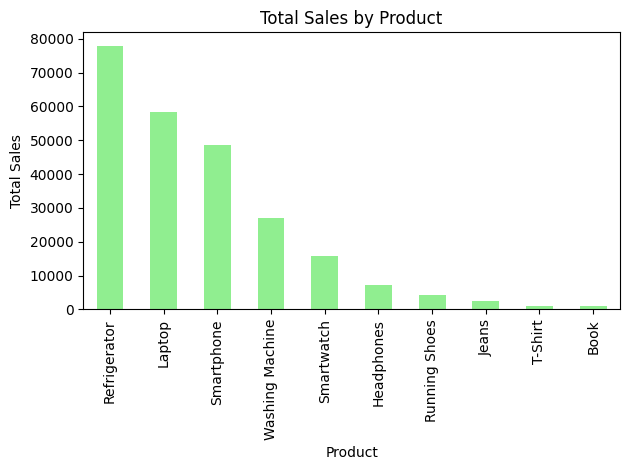

In [17]:
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
product_sales.plot(kind='bar', title='Total Sales by Product', color='lightgreen')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Dustribution of the Customers

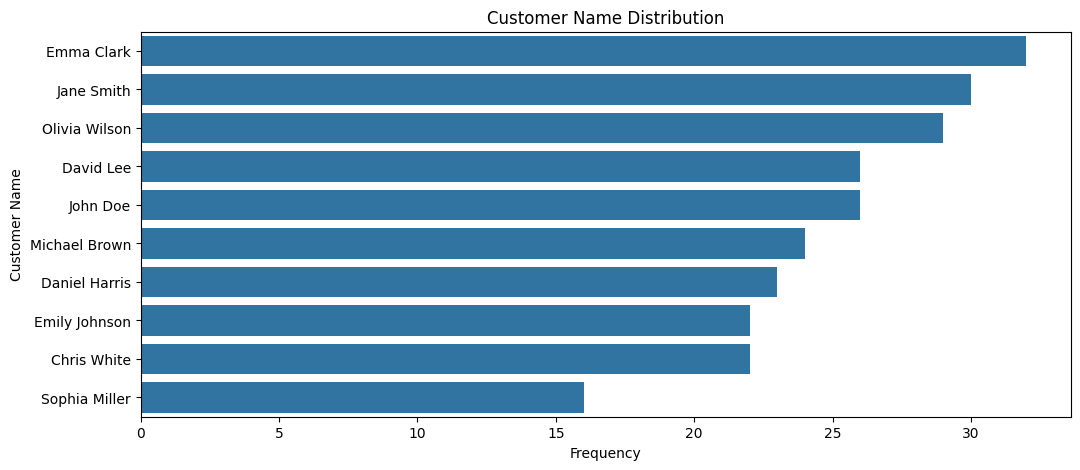

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["Customer Name"], order=df["Customer Name"].value_counts().index)
plt.xlabel("Frequency")
plt.ylabel("Customer Name")
plt.title("Customer Name Distribution")
plt.show()

## Sales trend Analysis

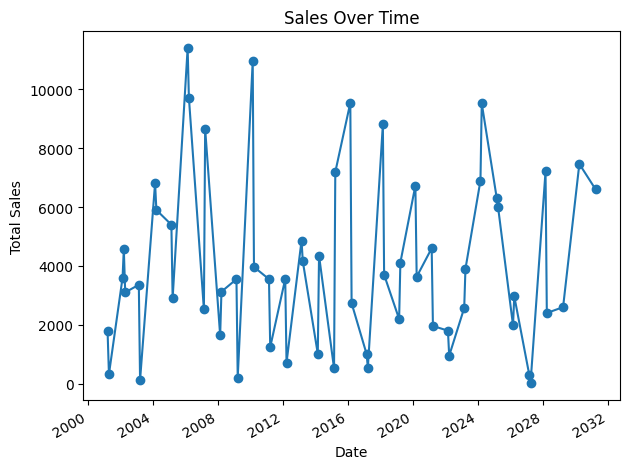

In [18]:
sales_over_time = df.groupby('Date')['Total Sales'].sum()
sales_over_time.plot(marker='o', title='Sales Over Time')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Distribution of Customer Location

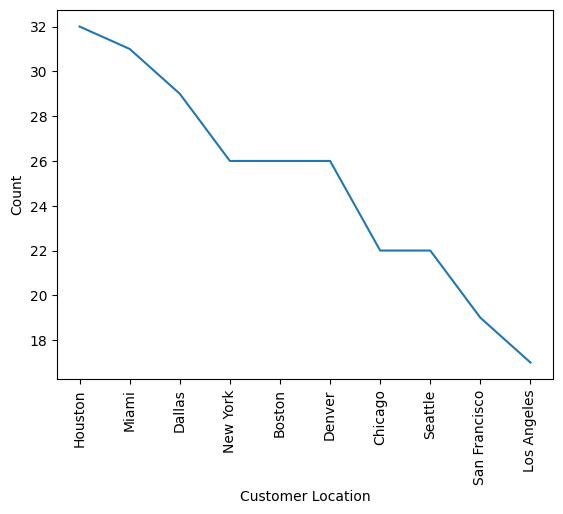

In [14]:

location_counts = df["Customer Location"].value_counts().reset_index()
location_counts.columns = ["Customer Location", "Count"]

# Plot the data
sns.lineplot(data=location_counts, x="Customer Location", y="Count")

plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()


## Distribution of the Oreders

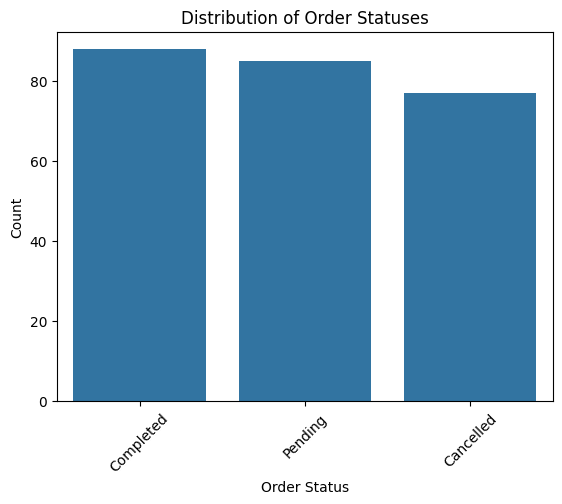

In [15]:
status_counts = df["Status"].value_counts()

# Create a bar plot
sns.barplot(x=status_counts.index, y=status_counts.values)

plt.xlabel("Order Status")
plt.ylabel("Count")
plt.title("Distribution of Order Statuses")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

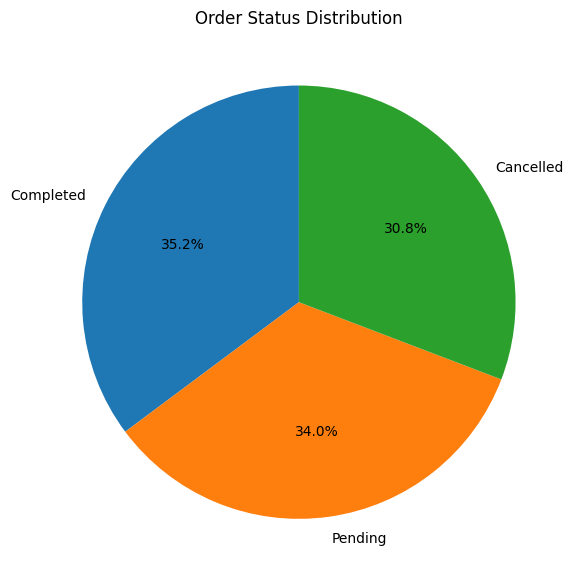

In [21]:
status_dist = df['Status'].value_counts()
status_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Order Status Distribution', figsize=(6, 6))
plt.ylabel('')
plt.tight_layout()
plt.show()

## Distribution of Payment Method

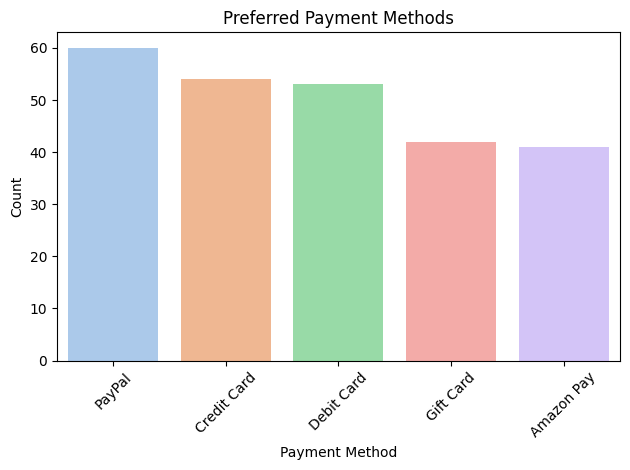

In [20]:
payment_pref = df['Payment Method'].value_counts()
sns.barplot(x=payment_pref.index, y=payment_pref.values, hue=payment_pref.index, palette="pastel", legend=False)
plt.title("Preferred Payment Methods")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

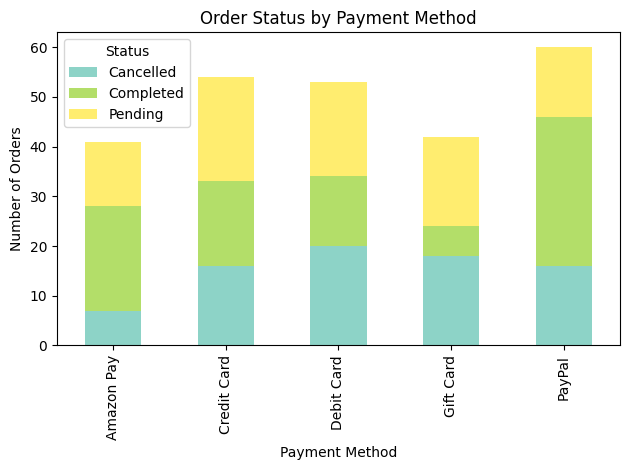

In [22]:
status_payment = pd.crosstab(df['Payment Method'], df['Status'])
status_payment.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Order Status by Payment Method')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

## Conclusion

In [25]:
repeat_customers = df['Customer Name'].value_counts()
payment_pref = df['Payment Method'].value_counts()

print("\n--- Recommendations ---")
if 'Cancelled' in df['Status'].values:
    print("- Investigate why some orders are being cancelled (e.g., 2 of 5 orders are cancelled).")
if repeat_customers[repeat_customers > 1].any():
    print("- Consider a loyalty program for returning customers.")
if payment_pref.get('Debit Card', 0) > 2:
    print("- Debit Card is the most used payment method. Ensure it's reliable for users.")



--- Recommendations ---
- Investigate why some orders are being cancelled (e.g., 2 of 5 orders are cancelled).
- Consider a loyalty program for returning customers.
- Debit Card is the most used payment method. Ensure it's reliable for users.
